In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
import os

Welcome to JupyROOT 6.18/00


In [4]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [5]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    fig.set_size_inches(15, 15)
    plt.title('Side View of TPC Volume', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

# Reading TPCeventoverlay.root

In [15]:
filename = "/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/x5Bkg/TPCEventOverlay667995519.root"#611905953.root"
filename_save = filename[-14:-5]
print(filename_save)
TPC = root_pandas.read_root(filename, 'tree')
TPC

667995519


,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-44.642743,-5.001807,55.607972,7221.814495,-44.5,-5.5,55.53625,7212.5,1,73,14,-211,True
1,-44.614851,-4.936561,56.194258,7297.955631,-44.5,-4.5,56.11375,7287.5,1,73,14,-211,True
2,-44.646192,-5.066856,56.136830,7290.497406,-44.5,-5.5,56.11375,7287.5,1,73,14,-211,True
3,-44.606250,-4.994935,55.685816,7231.924136,-44.5,-4.5,55.72875,7237.5,1,73,14,-211,True
4,-44.705094,-5.023422,55.862370,7254.853244,-44.5,-5.5,55.92125,7262.5,1,73,14,-211,True
5,-44.656424,-5.026474,55.776414,7243.690080,-44.5,-5.5,55.72875,7237.5,1,73,14,-211,True
6,-44.648414,-4.996774,56.063143,7280.927685,-44.5,-4.5,56.11375,7287.5,1,73,14,-211,True
7,-44.635048,-4.992018,55.893514,7258.897945,-44.5,-4.5,55.92125,7262.5,1,73,14,-211,True
8,-44.693446,-4.917145,56.048549,7279.032315,-44.5,-4.5,56.11375,7287.5,1,73,14,-211,True
9,-44.659162,-5.048258,56.200270,7298.736408,-44.5,-5.5,56.11375,7287.5,1,73,14,-211,True


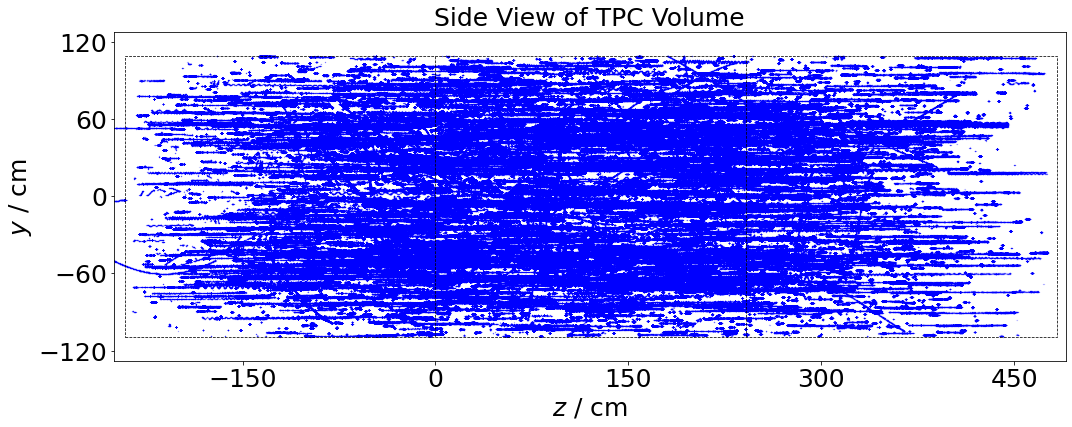

In [93]:
plot_sideprojection(TPC['z'], TPC['y'], sidename='y', hitcolor='blue', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf', sidelimlow=-128, sidelimup=128, zlimlow=-250, zlimup=490)

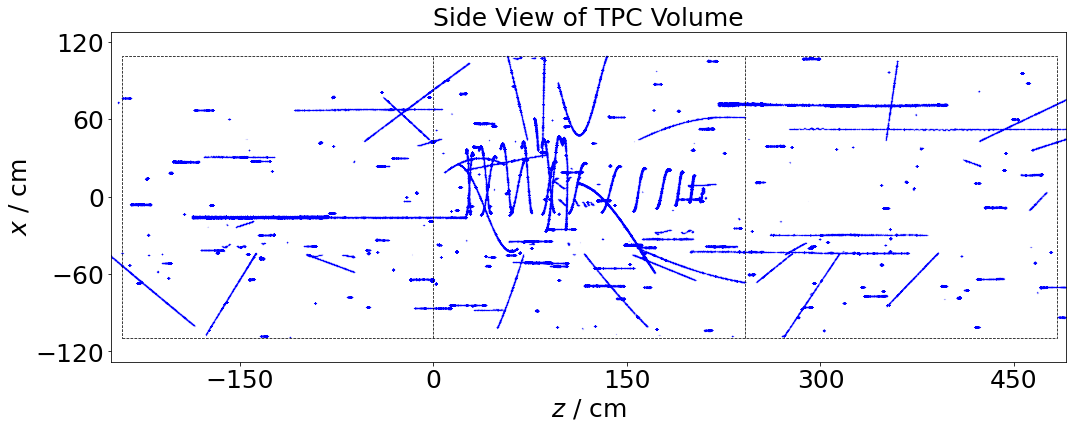

In [7]:
plot_sideprojection(TPC['z'], TPC['x'], sidename='x', hitcolor='blue', hitlabel='TPCDigits', savebool=False, savename='UpsisForPeter.pdf', sidelimlow=-128, sidelimup=128, zlimlow=-250, zlimup=490)

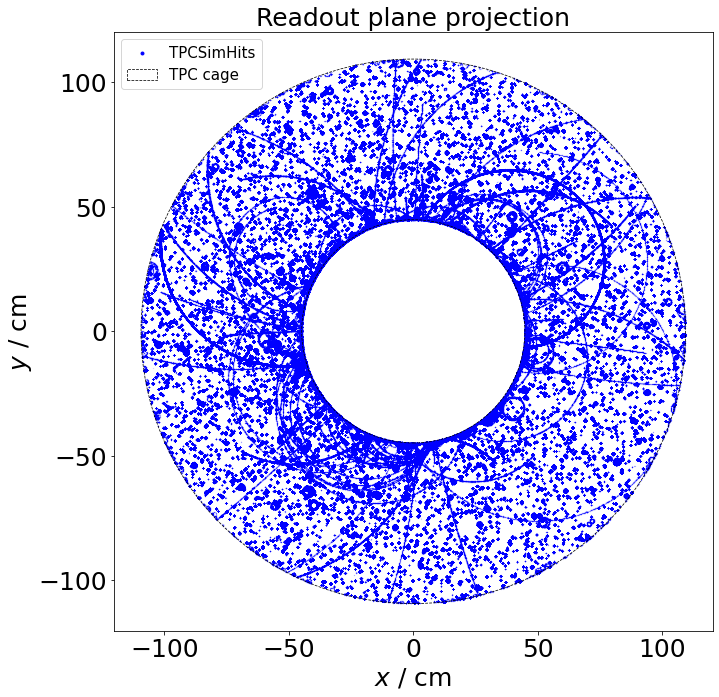

In [116]:
plot_xyprojection(TPC['x'], TPC['y'], hitcolor='blue', hitlabel='TPCSimHits', savebool=False, savename='UpsisForPeter.pdf')

## Defining Colormaps

In [6]:
cdict1 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.584, 0.584),
                   (0.10, 0.545, 0.545),
                   (0.20, 0.502, 0.502),
                   (0.30, 0.475, 0.475),
                   (0.40, 0.435, 0.435),
                   (0.50, 0.400, 0.400),
                   (0.60, 0.373, 0.373),
                   (0.70, 0.306, 0.306),
                   (0.80, 0.224, 0.224),
                   (0.90, 0.192, 0.192),
                   (1.00, 0.165, 0.165)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.765, 0.765),
                   (0.10, 0.729, 0.729),
                   (0.20, 0.694, 0.694),
                   (0.30, 0.659, 0.659),
                   (0.40, 0.627, 0.627),
                   (0.50, 0.596, 0.596),
                   (0.60, 0.549, 0.549),
                   (0.70, 0.498, 0.498),
                   (0.80, 0.404, 0.404),
                   (0.90, 0.373, 0.373),
                   (1.0 , 0.341, 0.341)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.894, 0.894),
                   (0.10, 0.871, 0.871),
                   (0.20, 0.843, 0.843),
                   (0.30, 0.808, 0.808),
                   (0.40, 0.788, 0.788),
                   (0.50, 0.765, 0.765),
                   (0.60, 0.729, 0.729),
                   (0.70, 0.686, 0.686),
                   (0.80, 0.588, 0.588),
                   (0.90, 0.553, 0.553),
                   (1.00, 0.522, 0.522))
        }
blue_tableau = LinearSegmentedColormap('TableauBlue', cdict1)


In [7]:
cdict2 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.906, 0.906),
                   (0.10, 0.867, 0.867),
                   (0.20, 0.831, 0.831),
                   (0.30, 0.792, 0.792),
                   (0.40, 0.753, 0.753),
                   (0.50, 0.714, 0.714),
                   (0.60, 0.663, 0.663),
                   (0.70, 0.608, 0.608),
                   (0.80, 0.561, 0.561),
                   (0.90, 0.522, 0.522),
                   (1.00, 0.486, 0.486)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.733, 0.733),
                   (0.10, 0.686, 0.686),
                   (0.20, 0.639, 0.639),
                   (0.30, 0.592, 0.592),
                   (0.40, 0.545, 0.545),
                   (0.50, 0.498, 0.498),
                   (0.60, 0.459, 0.459),
                   (0.70, 0.420, 0.420),
                   (0.80, 0.380, 0.380),
                   (0.90, 0.341, 0.341),
                   (1.0 , 0.302, 0.302)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.859, 0.859),
                   (0.10, 0.812, 0.812),
                   (0.20, 0.765, 0.765),
                   (0.30, 0.725, 0.725),
                   (0.40, 0.682, 0.682),
                   (0.50, 0.643, 0.643),
                   (0.60, 0.616, 0.616),
                   (0.70, 0.592, 0.592),
                   (0.80, 0.545, 0.545),
                   (0.90, 0.518, 0.518),
                   (1.00, 0.475, 0.475))
        }
purple_tableau = LinearSegmentedColormap('TableauPurple', cdict2)


In [8]:
cdict3 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.961, 0.961),
                   (0.10, 0.969, 0.969),
                   (0.20, 0.949, 0.949),
                   (0.30, 0.898, 0.898),
                   (0.40, 0.863, 0.863),
                   (0.50, 0.835, 0.835),
                   (0.60, 0.808, 0.808),
                   (0.70, 0.769, 0.769),
                   (0.80, 0.725, 0.725),
                   (0.90, 0.671, 0.671),
                   (1.00, 0.612, 0.612)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.647, 0.647),
                   (0.10, 0.541, 0.541),
                   (0.20, 0.439, 0.439),
                   (0.30, 0.353, 0.353),
                   (0.40, 0.271, 0.271),
                   (0.50, 0.184, 0.184),
                   (0.60, 0.114, 0.114),
                   (0.70, 0.106, 0.106),
                   (0.80, 0.098, 0.098),
                   (0.90, 0.086, 0.086),
                   (1.0 , 0.078, 0.078)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.612, 0.612),
                   (0.10, 0.490, 0.490),
                   (0.20, 0.380, 0.380),
                   (0.30, 0.282, 0.282),
                   (0.40, 0.208, 0.208),
                   (0.50, 0.145, 0.145),
                   (0.60, 0.102, 0.102),
                   (0.70, 0.090, 0.090),
                   (0.80, 0.102, 0.102),
                   (0.90, 0.122, 0.122),
                   (1.00, 0.137, 0.137))
        }
red_tableau = LinearSegmentedColormap('TableauRed', cdict3)


In [9]:
cdict4 = {'red':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000)),

         'green': ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.0 , 0.000, 0.000)),

         'blue':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000))
        }
grey_tableau = LinearSegmentedColormap('TableauGrey', cdict4)

In [10]:
cdict5 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.973, 0.973),
                   (0.10, 0.992, 0.992),
                   (0.20, 0.996, 0.996),
                   (0.30, 0.984, 0.984),
                   (0.40, 0.957, 0.957),
                   (0.50, 0.914, 0.914),
                   (0.60, 0.863, 0.863),
                   (0.70, 0.769, 0.769),
                   (0.80, 0.659, 0.659),
                   (0.90, 0.569, 0.569),
                   (1.00, 0.482, 0.482)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.714, 0.714),
                   (0.10, 0.659, 0.659),
                   (0.20, 0.588, 0.588),
                   (0.30, 0.514, 0.514),
                   (0.40, 0.435, 0.435),
                   (0.50, 0.361, 0.361),
                   (0.60, 0.290, 0.290),
                   (0.70, 0.239, 0.239),
                   (0.80, 0.204, 0.204),
                   (0.90, 0.192, 0.192),
                   (1.0 , 0.188, 0.188)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.486, 0.486),
                   (0.10, 0.388, 0.388),
                   (0.20, 0.290, 0.290),
                   (0.30, 0.196, 0.196),
                   (0.40, 0.114, 0.114),
                   (0.50, 0.047, 0.047),
                   (0.60, 0.016, 0.016),
                   (0.70, 0.000, 0.000),
                   (0.80, 0.000, 0.000),
                   (0.90, 0.047, 0.047),
                   (1.00, 0.082, 0.082))
        }
orange_tableau = LinearSegmentedColormap('TableauOrange', cdict5)

## Plotting Functions

In [11]:
class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle, 
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent], 
                          width / self.num_stripes, 
                          height, 
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)), 
                          transform=trans)
            stripes.append(s)
        return stripes

In [12]:
def eventplot(dataFrame, eventtype):
    
    fig, ax = plt.subplots()
    x = dataFrame['z']
    y = dataFrame['y']
    eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
    colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
    eventIndex=dataFrame['eventIndex']
    maxIndex = eventIndex.max()
    upsiindex = eventIndex
    if eventtype == 1:
        upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')    
    
    if eventtype == 0:
        for i in range(1,18):
            dataTrue = dataFrame[dataFrame['eventID']==i]
            x = dataTrue["z"]
            y = dataTrue["y"]
            eventIndex=dataTrue["eventIndex"]
            maxIndex = eventIndex.max()
            if i==1:
                upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
                upsiindex = 1- (upsiindex % 1)
            colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
            tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)

    else:
        tpchits = ax.scatter(x, y, marker='.', s = 0.001, c=colors[eventtype-1], cmap=colormaps[eventtype-1], vmin=0.0, vmax=1.0)
        
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlim(-250, 490)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
    cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
    plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,
           bbox_to_anchor=(1.0, 0.5),
           loc='upper left',
           fontsize=15)
        
    fig.set_size_inches(15, 5.5)
    plt.title(eventtypenames[eventtype]+' events', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    plt.savefig('plotsField/TPCOverlaySide'+filename_save)
    plt.show()
    plt.close()
    return fig

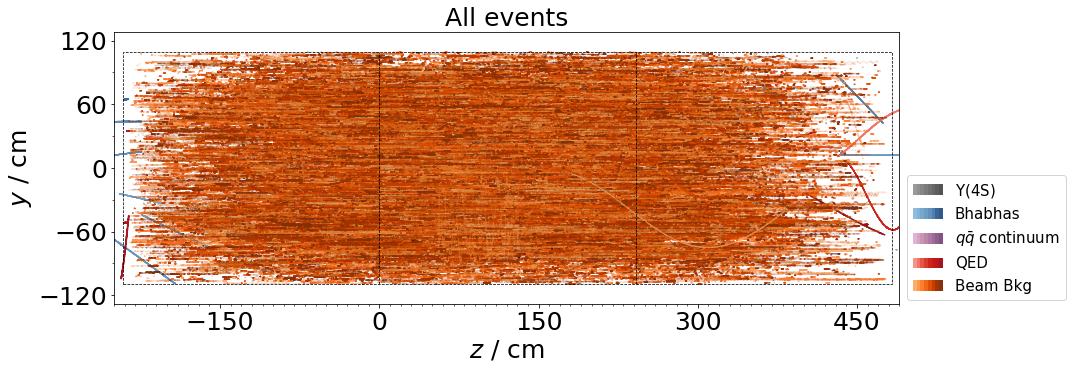

In [13]:
fig = eventplot(TPC, 0)
#plt.savefig('TPCOverlaySide.png')

with PdfPages('TPCBkgOverlayBG19_1.pdf') as pdf:
    for i in range(1):
        if i == 0:
            eventtypedata = TPC
            #continue
        else:
            eventtypedata = TPC[TPC['eventID']==i]
        
        fig = eventplot(eventtypedata, i)
        pdf.savefig(fig)
        
    

In [50]:
TPC

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-1.600621,44.898445,100.868254,13099.773234,-1.61,44.89,100.77375,13087.5,1,94,10,-211,True
1,-1.533180,44.833424,101.895592,13233.193702,-1.53,44.83,101.92875,13237.5,1,94,10,-211,True
2,-1.456552,44.956695,101.188514,13141.365463,-1.45,44.95,101.15875,13137.5,1,94,10,-211,True
3,-1.652741,44.933463,101.010470,13118.242917,-1.65,44.93,100.96625,13112.5,1,94,10,-211,True
4,-1.608151,44.999761,101.393071,13167.931363,-1.61,44.99,101.35125,13162.5,1,94,10,-211,True
5,-1.517235,44.832861,101.191976,13141.815045,-1.51,44.83,101.15875,13137.5,1,94,10,-211,True
6,-1.559586,44.894707,101.057952,13124.409400,-1.55,44.89,100.96625,13112.5,1,94,10,-211,True
7,-1.618109,44.954973,101.138622,13134.886008,-1.61,44.95,101.15875,13137.5,1,94,10,-211,True
8,-1.577765,44.990049,101.170689,13139.050543,-1.57,44.99,101.15875,13137.5,1,94,10,-211,True
9,-1.588158,44.965636,100.886536,13102.147571,-1.59,44.97,100.96625,13112.5,1,94,10,-211,True


In [49]:
def eventplotxy(dataFrame, eventtype):
    
    fig, ax = plt.subplots()
    x = dataFrame['x']
    y = dataFrame['y']
    eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
    colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
    eventIndex=dataFrame['eventIndex']
    maxIndex = eventIndex.max()
    upsiindex = eventIndex
    if eventtype == 1:
        upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75) 
    
    if eventtype == 0:
        for i in range(1,18):
            dataTrue = dataFrame[dataFrame['eventID']==i]
            x = dataTrue["x"]
            y = dataTrue["y"]
            eventIndex=dataTrue["eventIndex"]
            maxIndex = eventIndex.max()
            if i==1:
                upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
                upsiindex = 1- (upsiindex % 1)
            colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
            tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)

    else:
        tpchits = ax.scatter(x, y, marker='.', s = 0.001, c=colors[eventtype-1], cmap=colormaps[eventtype-1], vmin=0.0, vmax=1.0)
        
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(30))
    ax.set_xlim(-128, 128)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(circle1)
    
    cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
    cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
    plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,
           bbox_to_anchor=(1., 1),
           loc='upper left',
           fontsize=15)
        
    fig.set_size_inches(15, 15)
    plt.title(eventtypenames[eventtype]+' events', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    #ax.set_rasterized(True)
    plt.savefig('plotsField/TPCOverlayFront'+filename_save)
    plt.show()
    plt.close()
    return fig

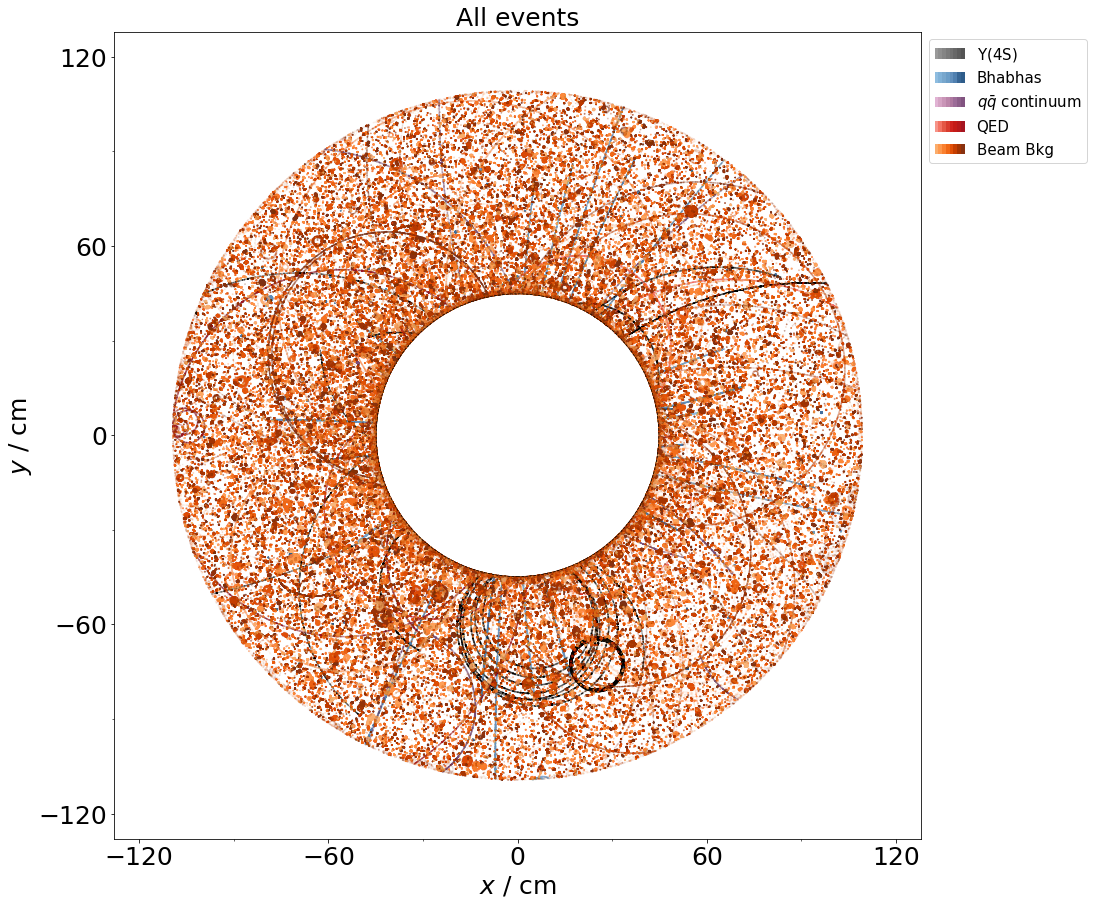

In [15]:
fig = eventplotxy(TPC, 0)

with PdfPages('TPCBkgOverlayBG19_1xy.pdf') as pdf:
    for i in range(1):
        if i == 0:
            eventtypedata = TPC
            #continue
        else:
            eventtypedata = TPC[TPC['eventID']==i]
        
        fig = eventplotxy(eventtypedata, i)
        pdf.savefig(fig)

## Plotting single event type

In [ ]:
def bhabhaplot(dataFrame, eventindex):
    fig, ax = plt.subplots()
    x = dataFrame['z']
    y = dataFrame['y']
    # eventtypenames = ['All', 'Upsilon(4S)', 'Bhabha', 'gamma gamma', 'mu+mu-', 'tau+tau-', 'u ubar', 'd dbar', 's sbar', 'c cbar', 'e+e-e+e-', 'e+e-mu+mu-']
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = 0.001, color='black')
    
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlim(-250, 490)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    fig.set_size_inches(15, 5.5)
    plt.title('Bhabha event '+str(eventindex), fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()

    plt.show()
    plt.close()
    return fig

In [ ]:
Bhabhas = TPC[TPC['eventID']==2]
Bhabhas

In [ ]:
bhabhaindices = Bhabhas.eventIndex.unique().tolist()
bhabhaindices

with PdfPages('bhabhaTest_events.pdf') as pdf:
    for i in bhabhaindices:
        
        data = Bhabhas[Bhabhas['eventIndex']==i]
        
        fig = bhabhaplot(data, i)
        pdf.savefig(fig)

## Counting tracks

In [16]:
TPCVolume = TPC[(TPC['z']>=0) & (TPC['z']<=242.69)]
TPCVolume

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-44.642743,-5.001807,55.607972,7221.814495,-44.5,-5.5,55.53625,7212.5,1,73,14,-211,True
1,-44.614851,-4.936561,56.194258,7297.955631,-44.5,-4.5,56.11375,7287.5,1,73,14,-211,True
2,-44.646192,-5.066856,56.136830,7290.497406,-44.5,-5.5,56.11375,7287.5,1,73,14,-211,True
3,-44.606250,-4.994935,55.685816,7231.924136,-44.5,-4.5,55.72875,7237.5,1,73,14,-211,True
4,-44.705094,-5.023422,55.862370,7254.853244,-44.5,-5.5,55.92125,7262.5,1,73,14,-211,True
5,-44.656424,-5.026474,55.776414,7243.690080,-44.5,-5.5,55.72875,7237.5,1,73,14,-211,True
6,-44.648414,-4.996774,56.063143,7280.927685,-44.5,-4.5,56.11375,7287.5,1,73,14,-211,True
7,-44.635048,-4.992018,55.893514,7258.897945,-44.5,-4.5,55.92125,7262.5,1,73,14,-211,True
8,-44.693446,-4.917145,56.048549,7279.032315,-44.5,-4.5,56.11375,7287.5,1,73,14,-211,True
9,-44.659162,-5.048258,56.200270,7298.736408,-44.5,-5.5,56.11375,7287.5,1,73,14,-211,True


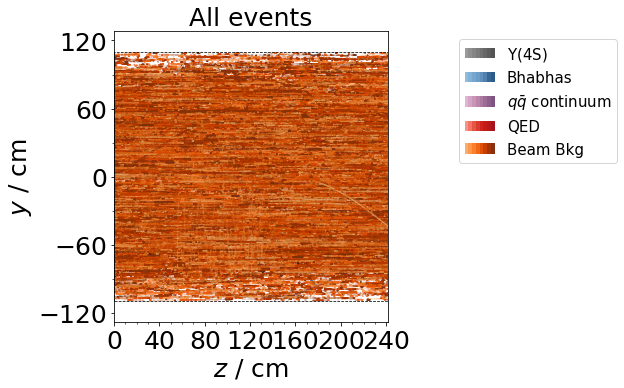

In [17]:
eventtype = 0
fig, ax = plt.subplots()
x = TPCVolume['z']
y = TPCVolume['y']
eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
eventIndex=TPCVolume['eventIndex']
maxIndex = eventIndex.max()
upsiindex = eventIndex
if eventtype == 1:
    upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
    upsiindex = 1- (upsiindex % 1)
colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
  
rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--') 
    

for i in range(1,18):
    dataTrue = TPCVolume[TPCVolume['eventID']==i]
    x = dataTrue["z"]
    y = dataTrue["y"]
    eventIndex=dataTrue["eventIndex"]
    maxIndex = eventIndex.max()
    if i==1:
        upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]

    tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)
        
ax.set_xlabel('$z$ / cm', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_xlim(-0, 241.69)

ax.set_ylabel('$y$ / cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(30))
ax.set_ylim(-128, 128)
    
ax.set_aspect('equal')
ax.tick_params(labelsize=25)
    
tpccage = ax.add_artist(rect1)
    
cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
# create proxy artists as handles:
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
plt.legend(handles=cmap_handles, 
        labels=cmap_labels, 
        handler_map=handler_map,
        bbox_to_anchor=(1.23, 1),
        fontsize=15)
        
fig.set_size_inches(15, 5.5)
plt.title(eventtypenames[eventtype]+' events', fontsize=25)
# lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
# lgnd.legendHandles[0]._sizes = [35]
fig.tight_layout()
#ax.set_rasterized(True)
#plt.savefig('physicshits_BG19x1.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')
plt.savefig('physicshits_BG19x5_deadtime_'+filename_save+'.png')

plt.show()
plt.close()

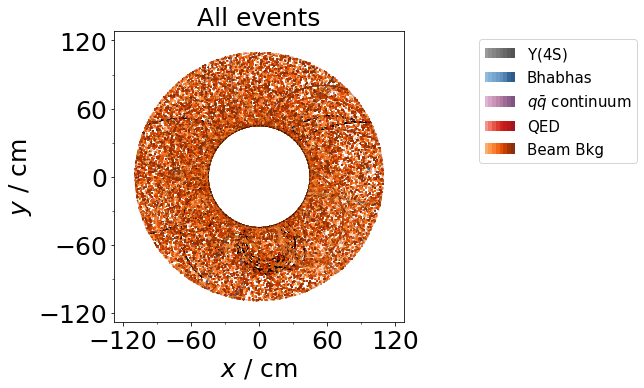

In [18]:
eventtype = 0
fig, ax = plt.subplots()
x = TPCVolume['x']
y = TPCVolume['y']
eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
eventIndex=TPCVolume['eventIndex']
maxIndex = eventIndex.max()
upsiindex = eventIndex
if eventtype == 1:
    upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
    upsiindex = 1- (upsiindex % 1)
colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
  
circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75) 
    

for i in range(1,18):
    dataTrue = TPCVolume[TPCVolume['eventID']==i]
    x = dataTrue["x"]
    y = dataTrue["y"]
    eventIndex=dataTrue["eventIndex"]
    maxIndex = eventIndex.max()
    if i==1:
        upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]

    tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)
        
ax.set_xlabel('$x$ / cm', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(30))
ax.set_xlim(-128, 128)

ax.set_ylabel('$y$ / cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(30))
ax.set_ylim(-128, 128)
    
ax.set_aspect('equal')
ax.tick_params(labelsize=25)
    
tpccage = ax.add_artist(circle1)
    
cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
# create proxy artists as handles:
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
plt.legend(handles=cmap_handles, 
        labels=cmap_labels, 
        handler_map=handler_map,
        bbox_to_anchor=(1.23, 1),
        fontsize=15)
        
fig.set_size_inches(15, 5.5)
plt.title(eventtypenames[eventtype]+' events', fontsize=25)
# lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
# lgnd.legendHandles[0]._sizes = [35]
fig.tight_layout()
#ax.set_rasterized(True)
#plt.savefig('physicshits_BG19x1.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')
plt.savefig('physicshitsxy_BG19x5_deadtime_'+filename_save+'.png')

plt.show()
plt.close()

In [17]:
for p in range(18):
    print(len(TPCVolume[TPCVolume["eventID"]==p]))

0
293273
127754
0
0
0
0
58661
0
0
8448
421
399164
348791
697270
7457982
122909
1924685


In [18]:
TPCUniqueTracks = TPCVolume.groupby(['eventID']).size().reset_index().rename(columns={0:'count'})
#TPCCutVolume = TPCCutVolume[TPCCutVolume['count']>=1000]
#TPCUniqueTracks = TPCUniqueTracks[(TPCUniqueTracks['pdg'] != 11) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']==2) & (TPCUniqueTracks['trackID'] <=2)) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']!=2) & (TPCUniqueTracks['trackID'] <=4))]
TPCUniqueTracks

,eventID,count
0,1,293273
1,2,127754
2,7,58661
3,10,8448
4,11,421
5,12,399164
6,13,348791
7,14,697270
8,15,7457982
9,16,122909


In [19]:
TPCUniqueTracks["count"]

0      293273
1      127754
2       58661
3        8448
4         421
5      399164
6      348791
7      697270
8     7457982
9      122909
10    1924685
Name: count, dtype: int64

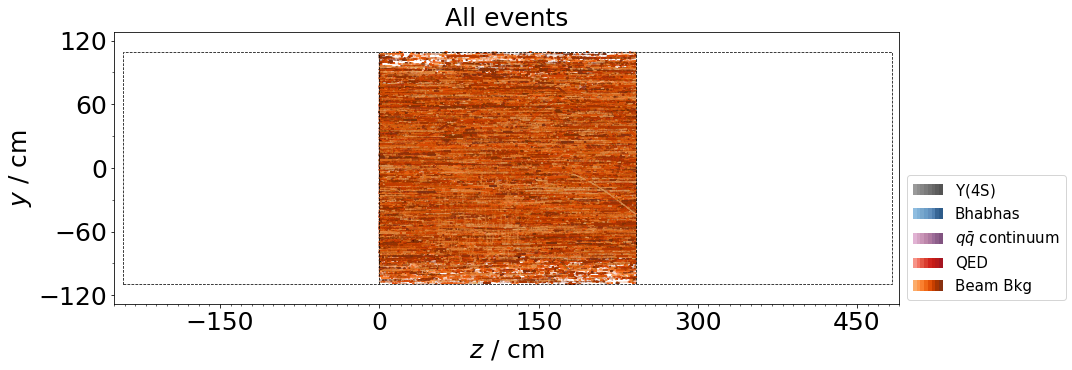

In [22]:
eventplot(TPCVolume, 0)

# Histogramming number of Hits

In [20]:
#filename = "/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p50d500/TPCEventOverlay3927780371.root"#611905953.root"
filename = "/gpfs/group/belle2/users/loeschca/dataTPCBkg5New/TPCEventOverlay911730718.root"
filename_save = filename[-14:-5]
print(filename_save)
TPC = root_pandas.read_root(filename, 'tree')
TPC

911730718


,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-1.600621,44.898445,100.868254,13099.773234,-1.61,44.89,100.77375,13087.5,1,94,10,-211,True
1,-1.533180,44.833424,101.895592,13233.193702,-1.53,44.83,101.92875,13237.5,1,94,10,-211,True
2,-1.456552,44.956695,101.188514,13141.365463,-1.45,44.95,101.15875,13137.5,1,94,10,-211,True
3,-1.652741,44.933463,101.010470,13118.242917,-1.65,44.93,100.96625,13112.5,1,94,10,-211,True
4,-1.608151,44.999761,101.393071,13167.931363,-1.61,44.99,101.35125,13162.5,1,94,10,-211,True
5,-1.517235,44.832861,101.191976,13141.815045,-1.51,44.83,101.15875,13137.5,1,94,10,-211,True
6,-1.559586,44.894707,101.057952,13124.409400,-1.55,44.89,100.96625,13112.5,1,94,10,-211,True
7,-1.618109,44.954973,101.138622,13134.886008,-1.61,44.95,101.15875,13137.5,1,94,10,-211,True
8,-1.577765,44.990049,101.170689,13139.050543,-1.57,44.99,101.15875,13137.5,1,94,10,-211,True
9,-1.588158,44.965636,100.886536,13102.147571,-1.59,44.97,100.96625,13112.5,1,94,10,-211,True


In [21]:
TPCVolume = TPC[(TPC['z']>=0) & (TPC['z']<=241.69)]
TPCVolume

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-1.600621,44.898445,100.868254,13099.773234,-1.61,44.89,100.77375,13087.5,1,94,10,-211,True
1,-1.533180,44.833424,101.895592,13233.193702,-1.53,44.83,101.92875,13237.5,1,94,10,-211,True
2,-1.456552,44.956695,101.188514,13141.365463,-1.45,44.95,101.15875,13137.5,1,94,10,-211,True
3,-1.652741,44.933463,101.010470,13118.242917,-1.65,44.93,100.96625,13112.5,1,94,10,-211,True
4,-1.608151,44.999761,101.393071,13167.931363,-1.61,44.99,101.35125,13162.5,1,94,10,-211,True
5,-1.517235,44.832861,101.191976,13141.815045,-1.51,44.83,101.15875,13137.5,1,94,10,-211,True
6,-1.559586,44.894707,101.057952,13124.409400,-1.55,44.89,100.96625,13112.5,1,94,10,-211,True
7,-1.618109,44.954973,101.138622,13134.886008,-1.61,44.95,101.15875,13137.5,1,94,10,-211,True
8,-1.577765,44.990049,101.170689,13139.050543,-1.57,44.99,101.15875,13137.5,1,94,10,-211,True
9,-1.588158,44.965636,100.886536,13102.147571,-1.59,44.97,100.96625,13112.5,1,94,10,-211,True


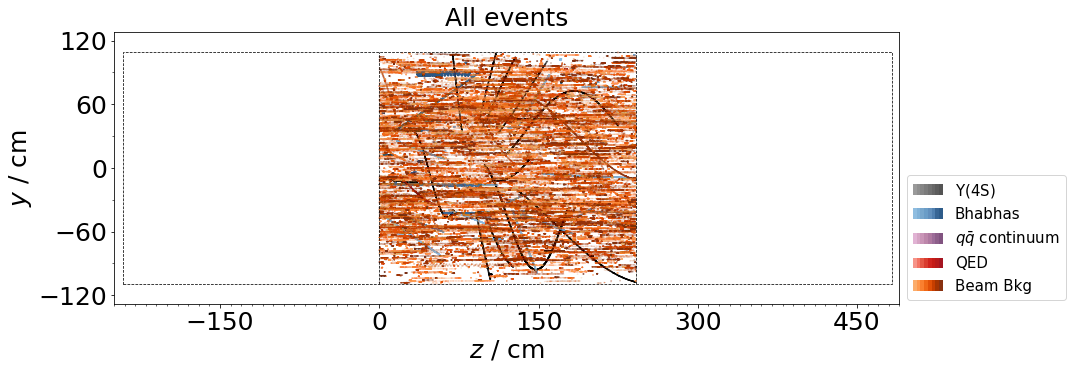

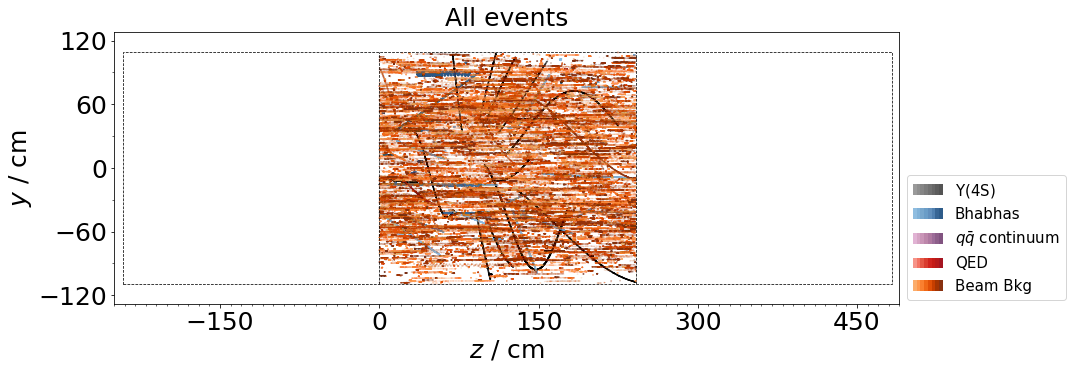

In [22]:
eventplot(TPCVolume, 0)

In [23]:
def count_hits(filename):
    hitarray = []
    #filename = '/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p50d500/'+filename
    filename = '/gpfs/group/belle2/users/loeschca/dataTPCBkg5New/'+filename
    TPC = root_pandas.read_root(filename, 'tree')
    TPCVolume = TPC[(TPC['z']>=0) & (TPC['z']<=242.69)]
    for p in range(1,18):
        hitarray.append(len(TPCVolume[TPCVolume["eventID"]==p]))
    return hitarray    

In [28]:
nfiles =20

In [29]:

hits = np.zeros(shape=(17, nfiles+1))

#tracklist = count_tracks('dataTPC/TPCEventOverlay3825921711.root')
#tracklist
i=0

for f in os.listdir('/gpfs/group/belle2/users/loeschca/dataTPCBkg5New/'):
    hitlist = count_hits(f)
    print(hitlist)
    print(f)
    
    for j in range(0,17):
        hits[j][i]=hitlist[j]
    i+=1
    
hits[0][0]



[259236, 153356, 172, 0, 0, 0, 0, 0, 0, 8880, 0, 55536, 57716, 176334, 1407353, 33315, 373894]
TPCEventOverlay2237581474.root
[122448, 330926, 0, 0, 0, 23815, 0, 0, 0, 0, 19228, 54629, 114699, 179518, 1611157, 35948, 331172]
TPCEventOverlay3031844230.root
[150383, 228120, 0, 0, 0, 0, 0, 0, 0, 38456, 24406, 78547, 61211, 188264, 1458259, 12307, 397962]
TPCEventOverlay1368435601.root
[170619, 146299, 0, 0, 0, 0, 0, 0, 0, 49611, 0, 77510, 50891, 174405, 1547400, 24277, 351786]
TPCEventOverlay560906411.root
[533202, 176741, 0, 0, 0, 0, 0, 0, 0, 0, 0, 58725, 61514, 147063, 1615141, 19819, 332798]
TPCEventOverlay815215087.root
[97715, 93524, 0, 0, 0, 0, 0, 0, 0, 88, 0, 69713, 67740, 158727, 1546082, 10184, 368099]
TPCEventOverlay1038614003.root
[82937, 80922, 0, 0, 0, 0, 0, 0, 0, 13028, 0, 78655, 57613, 142012, 1590239, 21954, 374822]
TPCEventOverlay932940148.root
[259257, 147592, 0, 0, 0, 409, 0, 0, 0, 58598, 0, 67026, 33396, 194340, 1509356, 38400, 386185]
TPCEventOverlay3644980489.root
[2

259236.0

# hits

In [30]:
sumbkghits = np.zeros(nfiles)
for i in range(nfiles):
    sumbkghits[i] = hits[11][i] + hits[12][i] + hits[13][i] + hits[14][i] +hits[15][i] +hits[16][i]
#sumbkghits[0] = hits[11][0] + hits[12][0] + hits[13][0] + hits[14][0] +hits[15][0] +hits[16][0]
sumbkghits

array([2104148., 2327123., 2196550., 2226269., 2235060., 2220545.,
       2265295., 2228703., 2156108., 2303818., 2196621., 2207965.,
       2191833., 2212754., 2291784., 2108529., 2193752., 2256480.,
       2246814., 2010143.])

In [31]:
maxtrax=np.amax(hits)
maxtrax

1617256.0

In [32]:
bins = []
for i in range(int(np.amax(hits))+1):
    bins.append(i - 0.5)
bins

[-0.5,
 0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5,
 22.5,
 23.5,
 24.5,
 25.5,
 26.5,
 27.5,
 28.5,
 29.5,
 30.5,
 31.5,
 32.5,
 33.5,
 34.5,
 35.5,
 36.5,
 37.5,
 38.5,
 39.5,
 40.5,
 41.5,
 42.5,
 43.5,
 44.5,
 45.5,
 46.5,
 47.5,
 48.5,
 49.5,
 50.5,
 51.5,
 52.5,
 53.5,
 54.5,
 55.5,
 56.5,
 57.5,
 58.5,
 59.5,
 60.5,
 61.5,
 62.5,
 63.5,
 64.5,
 65.5,
 66.5,
 67.5,
 68.5,
 69.5,
 70.5,
 71.5,
 72.5,
 73.5,
 74.5,
 75.5,
 76.5,
 77.5,
 78.5,
 79.5,
 80.5,
 81.5,
 82.5,
 83.5,
 84.5,
 85.5,
 86.5,
 87.5,
 88.5,
 89.5,
 90.5,
 91.5,
 92.5,
 93.5,
 94.5,
 95.5,
 96.5,
 97.5,
 98.5,
 99.5,
 100.5,
 101.5,
 102.5,
 103.5,
 104.5,
 105.5,
 106.5,
 107.5,
 108.5,
 109.5,
 110.5,
 111.5,
 112.5,
 113.5,
 114.5,
 115.5,
 116.5,
 117.5,
 118.5,
 119.5,
 120.5,
 121.5,
 122.5,
 123.5,
 124.5,
 125.5,
 126.5,
 127.5,
 128.5,
 129.5,
 130.5,
 131.5,
 132.5,
 133.5,
 134.5,
 135.5,
 136.5,
 137.5,

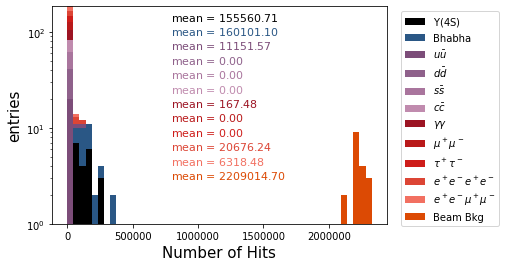

In [33]:
fig, ax = plt.subplots()
#labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Beam Bkg']
#colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380), (0.482, 0.188, 0.082), (0.659, 0.204, 0.000), (0.863, 0.290, 0.016), (0.957, 0.435, 0.114), (0.996, 0.588, 0.290), (0.973, 0.714, 0.486)]
colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380), (0.863, 0.290, 0.016)]
#bins = []
#for i in range(int(np.amax(hits))+1):
#    bins.append(i - 0.5)
n, axbins, patches = ax.hist([hits[0], hits[1], hits[5], hits[6], hits[7], hits[8], hits[2], hits[3], hits[4], hits[9], hits[10], sumbkghits], bins=50, stacked=True, label=labels, color=colors)

ax.set_xlabel(r'Number of Hits', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
#ax.set_ylim(0, 60)
ax.set_yscale('log')

plt.figtext(.40, .83, r'mean = $%.2f$' % (hits[0].mean()), fontsize=11, color=colors[0])
plt.figtext(.40, .78, r'mean = $%.2f$' % (hits[1].mean()), fontsize=11, color=colors[1])
plt.figtext(.40, .73, r'mean = $%.2f$' % (hits[5].mean()), fontsize=11, color=colors[2])
plt.figtext(.40, .68, r'mean = $%.2f$' % (hits[6].mean()), fontsize=11, color=colors[3])
plt.figtext(.40, .63, r'mean = $%.2f$' % (hits[7].mean()), fontsize=11, color=colors[4])
plt.figtext(.40, .58, r'mean = $%.2f$' % (hits[8].mean()), fontsize=11, color=colors[5])
plt.figtext(.40, .53, r'mean = $%.2f$' % (hits[2].mean()), fontsize=11, color=colors[6])
plt.figtext(.40, .48, r'mean = $%.2f$' % (hits[3].mean()), fontsize=11, color=colors[7])
plt.figtext(.40, .43, r'mean = $%.2f$' % (hits[4].mean()), fontsize=11, color=colors[8])
plt.figtext(.40, .38, r'mean = $%.2f$' % (hits[9].mean()), fontsize=11, color=colors[9])
plt.figtext(.40, .33, r'mean = $%.2f$' % (hits[10].mean()), fontsize=11, color=colors[10])
plt.figtext(.40, .28, r'mean = $%.2f$' % (sumbkghits.mean()), fontsize=11, color=colors[11])
#plt.figtext(.60, .83, r'mean = $%.2f$' % (hits[11].mean()), fontsize=11, color=colors[11])
#plt.figtext(.60, .78, r'mean = $%.2f$' % (hits[12].mean()), fontsize=11, color=colors[12])
#plt.figtext(.60, .73, r'mean = $%.2f$' % (hits[13].mean()), fontsize=11, color=colors[13])
#plt.figtext(.60, .68, r'mean = $%.2f$' % (hits[14].mean()), fontsize=11, color=colors[14])
#plt.figtext(.60, .63, r'mean = $%.2f$' % (hits[15].mean()), fontsize=11, color=colors[15])
#plt.figtext(.60, .58, r'mean = $%.2f$' % (hits[16].mean()), fontsize=11, color=colors[16])


#plt.title('Number of Hits per Physics Event', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
lgnd = ax.legend(handles, labels, bbox_to_anchor=(1.35, 1))
#fig.tight_layout()

plt.savefig('physicshits_BG19_TPCBkg5New_deadtime_'+filename_save+'.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')

In [72]:
TPCmc = TPC[TPC['eventID']>=12]

In [69]:
ELTPC = TPC[TPC['pdg']==11]

In [71]:
ELTPC[ELTPC['pdg']==+11]

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
4731,-27.118539,98.196989,124.909290,16221.985694,-27.11,98.19,124.83625,16212.5,1,94,24,11,True
4732,-26.992406,98.144797,124.529396,16172.648824,-26.99,98.15,124.45125,16162.5,1,94,24,11,True
4733,-27.138852,98.177030,125.177510,16256.819511,-27.13,98.17,125.22125,16262.5,1,94,24,11,True
4734,-27.141940,98.058467,124.818665,16210.216172,-27.15,98.05,124.83625,16212.5,1,94,24,11,True
4735,-27.082586,98.005430,124.859838,16215.563339,-27.09,98.01,124.83625,16212.5,1,94,24,11,True
4736,-27.195783,98.047742,124.421820,16158.677971,-27.19,98.05,124.45125,16162.5,1,94,24,11,True
4737,-27.125323,98.118801,125.315706,16274.767019,-27.13,98.11,125.22125,16262.5,1,94,24,11,True
4738,-26.941645,98.126756,125.327682,16276.322392,-26.95,98.13,125.41375,16287.5,1,94,24,11,True
4739,-27.226623,98.117608,125.316639,16274.888161,-27.23,98.11,125.22125,16262.5,1,94,24,11,True
4740,-27.078340,98.073621,124.653413,16188.754977,-27.07,98.07,124.64375,16187.5,1,94,24,11,True


In [85]:
OTHERTPC = TPCmc[abs(TPCmc['pdg'])!=11]
OTHERTPC[OTHERTPC['pdg']!=1000180400]

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
1738485,-90.845731,-42.141999,330.760717,42955.937310,-90.85,-42.15,330.81125,42962.5,14,5737,5307,1000060120,True
1738486,-90.943074,-41.906888,330.761997,42956.103496,-90.95,-41.91,330.81125,42962.5,14,5737,5307,1000060120,True
1738487,-90.849183,-42.009454,330.432240,42913.277955,-90.85,-42.01,330.42625,42912.5,14,5737,5307,1000060120,True
1738488,-90.863626,-42.002083,330.672965,42944.540910,-90.87,-42.01,330.61875,42937.5,14,5737,5307,1000060120,True
1738489,-90.923933,-41.985355,330.309152,42897.292475,-90.93,-41.99,330.23375,42887.5,14,5737,5307,1000060120,True
1738490,-90.817157,-42.147914,330.283686,42893.985247,-90.81,-42.15,330.23375,42887.5,14,5737,5307,1000060120,True
1738491,-90.713765,-42.149166,330.445324,42914.977133,-90.71,-42.15,330.42625,42912.5,14,5737,5307,1000060120,True
1738492,-90.847359,-42.004326,330.769629,42957.094658,-90.85,-42.01,330.81125,42962.5,14,5737,5307,1000060120,True
1738493,-90.739632,-42.118152,330.716218,42950.158124,-90.73,-42.11,330.81125,42962.5,14,5737,5307,1000060120,True
1738494,-90.718029,-42.024585,330.391873,42908.035458,-90.71,-42.03,330.42625,42912.5,14,5737,5307,1000060120,True


In [82]:
el = len(TPCmc[TPCmc['pdg']==+11])
po = len(TPCmc[TPCmc['pdg']==-11])
other = len(TPCmc[abs(TPCmc['pdg'])!=11])
ar = len(TPCmc[TPCmc['pdg']==1000180400])

In [83]:
print(el/len(TPCmc))
print(po/len(TPCmc))
print(other/len(TPCmc))
print(ar/len(TPCmc))

0.9659784978516438
0.014901214198278352
0.019120287950077863
0.001964023179614249


In [79]:
print((el+po+other)/len(TPCmc))

1.0


In [62]:
print(len(TPCmc[TPCmc['pdg']!=11])/len(TPCmc))

0.03402150214835621


In [34]:
allhits = np.zeros(nfiles, dtype=int)
unwantedhits = np.zeros(nfiles, dtype=int)
for i in range(nfiles):
    for j in range(17):
        allhits[i]+=hits[j][i]
        if j!=0:
            unwantedhits[i] += hits[j][i]


In [35]:
unwantedhits

array([2266556, 2701092, 2487532, 2422179, 2411801, 2314157, 2359245,
       2435302, 2330682, 2590846, 2330349, 2250951, 2633440, 2334382,
       2435071, 2329616, 2259293, 2388985, 2511066, 2178601])

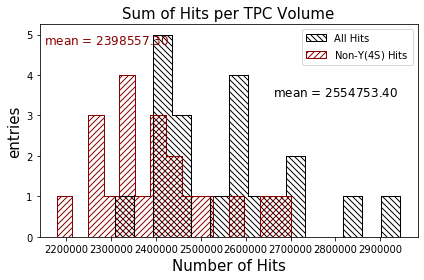

In [36]:
def plt_hist(axis, data, bins, color, hatch, label):
            counts, edges = np.histogram(data, bins=bins)
            edges = np.repeat(edges, 2)
            hist = np.hstack((0, np.repeat(counts, 2), 0))

            outline, = ax.plot(edges, hist, linewidth=1, color=color)
            axis.fill_between(edges, hist, 0,
                              edgecolor=outline.get_color(), hatch=hatch, label=label,
                              facecolor='none')  # < removes facecolor
            axis.set_ylim(0, None, auto=True)
            

fig, ax = plt.subplots()
# labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
# colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380)]
#bins = []
#for i in range(int(np.amax(alltracks))+1):
#    bins.append(i - 0.5)
    
plt_hist(ax, allhits, 15, 'black', r'\ \ \ \ ', 'All Hits')
plt_hist(ax, unwantedhits, 15, 'darkred', '////', r'Non-$\Upsilon$(4S) Hits')
#n, axbins, patches = ax.hist([alltracks, unwantedtracks], bins=bins, )

ax.set_xlabel(r'Number of Hits', fontsize=15)
ax.set_ylabel('entries', fontsize=15)


plt.figtext(.64, .65, r'mean = $%.2f$' % (allhits.mean()), fontsize=12, color='black')
plt.figtext(.11, .83, r'mean = $%.2f$' % (unwantedhits.mean()), fontsize=12, color='darkred')

plt.title('Sum of Hits per TPC Volume', fontsize=15)

plt.legend()
fig.tight_layout()
plt.savefig('sumhits_BG19_TPCBkg5New_deadtime_'+filename_save+'.pdf')

# Density of hits

In [37]:
meanhit = allhits.mean()
meanhit

2554753.4

In [38]:
meanhit = meanhit*5
meanhit

12773767.0

In [39]:
gain = 2000
flowback = 0.01
K = 203.3 # cm²/(V*s)
E = 289   # V / cm
v = K*E   # cm / s
v = v/10**6  # cm / us
v

0.058753700000000006

In [40]:
ion_dist = v * 30.75
ion_dist

1.8066762750000003

In [41]:
ion_number = meanhit * gain * flowback
ion_number

255475340.0

In [42]:
ion_density = ion_number / (ion_dist*np.pi*(109.4**2 - 44.85**2))
ion_density

4520.613236218322

In [43]:
e = 1.602176634*10**(-19)
charge_density = ion_density * e
charge_density # C/cm^3

7.242820898420118e-16

In [44]:
charge_density = charge_density*10**(15) 
charge_density #fC/cm^3

0.7242820898420118

In [45]:
#meanhit = 16776585.88
area = np.pi*(109.4**2 - 44.85**2)
area

31280.327542987365

In [46]:
xrange = np.linspace(50, 1050, num=101)

numpix = np.zeros(shape=(101))
hitpix = np.zeros(shape=(101))
for i in range(101):
    numpix[i] = area/(xrange[i]*(10**(-4))*xrange[i]*(10**(-4)))
    if xrange[i]==50:
        print(numpix[i])
    hitpix[i] = meanhit/numpix[i]
numpix

1251213101.7194946


array([1.25121310e+09, 8.68897987e+08, 6.38374031e+08, 4.88755118e+08,
       3.86176883e+08, 3.12803275e+08, 2.58515104e+08, 2.17224497e+08,
       1.85090696e+08, 1.59593508e+08, 1.39023678e+08, 1.22188779e+08,
       1.08236427e+08, 9.65442208e+07, 8.66491068e+07, 7.82008189e+07,
       7.09304479e+07, 6.46287759e+07, 5.91310540e+07, 5.43061242e+07,
       5.00485241e+07, 4.62726739e+07, 4.29085426e+07, 3.98983770e+07,
       3.71942064e+07, 3.47559195e+07, 3.25497685e+07, 3.05471949e+07,
       2.87239004e+07, 2.70591069e+07, 2.55349613e+07, 2.41360552e+07,
       2.28490340e+07, 2.16622767e+07, 2.05656328e+07, 1.95502047e+07,
       1.86081663e+07, 1.77326120e+07, 1.69174297e+07, 1.61571940e+07,
       1.54470753e+07, 1.47827635e+07, 1.41604018e+07, 1.35765311e+07,
       1.30280415e+07, 1.25121310e+07, 1.20262697e+07, 1.15681685e+07,
       1.11357521e+07, 1.07271356e+07, 1.03406041e+07, 9.97459424e+06,
       9.62767853e+06, 9.29855159e+06, 8.98601768e+06, 8.68897987e+06,
      

In [47]:
hitpix 

array([0.01020911, 0.01470111, 0.02000985, 0.02613531, 0.0330775 ,
       0.04083642, 0.04941207, 0.05880445, 0.06901356, 0.08003939,
       0.09188195, 0.10454124, 0.11801726, 0.13231001, 0.14741949,
       0.16334569, 0.18008863, 0.19764829, 0.21602468, 0.2352178 ,
       0.25522765, 0.27605422, 0.29769753, 0.32015756, 0.34343432,
       0.36752781, 0.39243803, 0.41816498, 0.44470865, 0.47206905,
       0.50024619, 0.52924005, 0.55905064, 0.58967795, 0.621122  ,
       0.65338277, 0.68646028, 0.72035451, 0.75506547, 0.79059316,
       0.82693757, 0.86409872, 0.90207659, 0.9408712 , 0.98048253,
       1.02091059, 1.06215537, 1.10421689, 1.14709513, 1.19079011,
       1.23530181, 1.28063024, 1.3267754 , 1.37373728, 1.4215159 ,
       1.47011124, 1.51952332, 1.56975212, 1.62079765, 1.6726599 ,
       1.72533889, 1.7788346 , 1.83314705, 1.88827622, 1.94422212,
       2.00098475, 2.0585641 , 2.11696019, 2.176173  , 2.23620255,
       2.29704882, 2.35871182, 2.42119154, 2.484488  , 2.54860

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text yticklabel objects>)

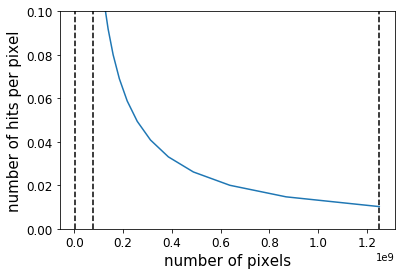

In [48]:
plt.plot(numpix, hitpix)
plt.xlabel("number of pixels", fontsize=15)
plt.ylabel("number of hits per pixel", fontsize=15)
plt.ylim(0,0.1)
plt.vlines(78200818.85746841, 0.0, 0.1, ls='--')
plt.vlines(1251213101.7194946, 0.0, 0.1, ls='--')
plt.vlines(3128032.7542987363, 0.0, 0.1, ls='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)